In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("manchunhui/us-election-2020-tweets")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/us-election-2020-tweets


In [11]:
import os

# Show all files in the downloaded dataset path
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv
/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv


In [13]:
import pandas as pd

# Load Trump tweets
trump_df = pd.read_csv(
    '/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv',
    encoding='utf-8',
    on_bad_lines='skip',  # Skip bad lines
    engine='python'       # Use Python engine for better error handling
)

# Load Biden tweets
biden_df = pd.read_csv(
    '/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv',
    encoding='utf-8',
    on_bad_lines='skip',
    engine='python'
)

trump_df['candidate'] = 'Trump'
biden_df['candidate'] = 'Biden'

df = pd.concat([trump_df, biden_df], ignore_index=True)
df.head()


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Trump
1,2020-10-15 00:00:01,1.3165292227484303e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Trump
2,2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.5202471,-122.6741949,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
3,2020-10-15 00:00:02,1.316529227471237e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.28355589206057e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Trump
4,2020-10-15 00:00:08,1.3165292523014513e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,47413798.0,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.8949924,-77.0365581,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump


In [16]:
# Check nulls only on a smaller sample (e.g. first 1000 rows)
df.head(1000).isnull().sum()


created_at                0
tweet_id                  0
tweet                     0
likes                     0
retweet_count             0
source                    2
user_id                   0
user_name                 0
user_screen_name          0
user_description        105
user_join_date            0
user_followers_count      0
user_location           286
lat                     460
long                    460
city                    728
country                 461
continent               461
state                   568
state_code              583
collected_at              0
candidate                 0
dtype: int64

**Tweet Counts by Candidate**

In [22]:
df['candidate'].value_counts()


candidate
Trump    971087
Biden    777073
Name: count, dtype: int64

**Tweets Over Time**

In [33]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

In [34]:
df = df.dropna(subset=['created_at'])

<Axes: title={'center': 'Tweet Volume Over Time'}, xlabel='date'>

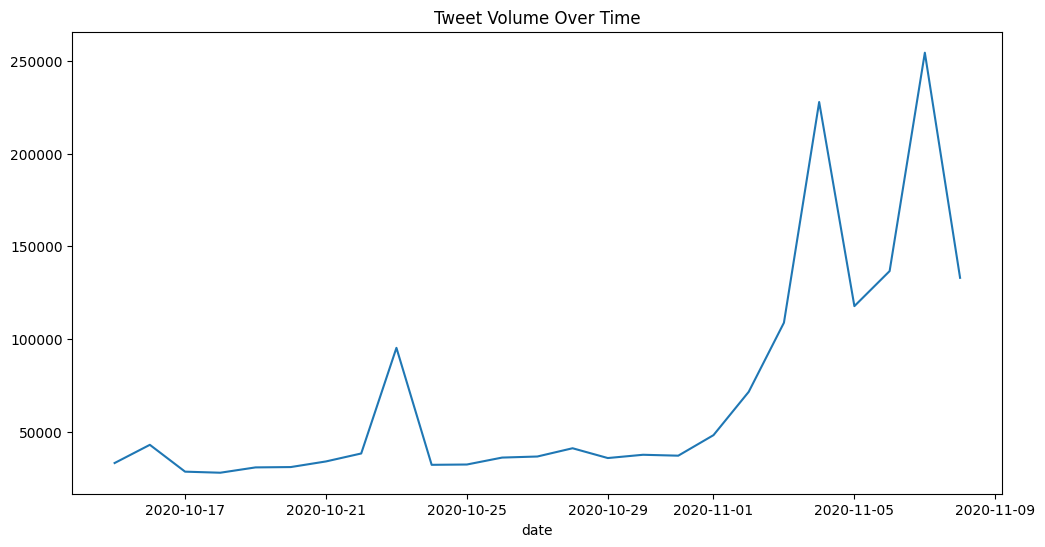

In [35]:
df['date'] = df['created_at'].dt.date
df['date'].value_counts().sort_index().plot(
    kind='line',
    figsize=(12, 6),
    title="Tweet Volume Over Time"
)


**Most Liked Tweets (Top 5)**

In [24]:
df[['tweet', 'likes', 'candidate']].sort_values(by='likes', ascending=False).head(5)


,tweet,likes,candidate
71415,1545.0,"ÜT: -29.191133,26.2234328",Trump
1706684,593.0,san antonio de los altos,Biden
1154912,0.0,bursa web client,Biden
1717845,3775.0,Veracruz,Biden
1716431,3775.0,Veracruz,Biden


**Compare Trump vs Biden Tweet Frequencies**. 

<Axes: title={'center': 'Tweet Counts by Candidate'}, xlabel='candidate'>

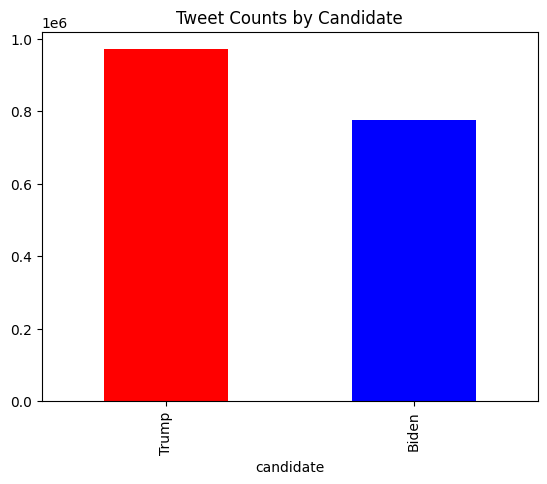

In [26]:
df['candidate'].value_counts().plot(kind='bar', title="Tweet Counts by Candidate", color=['red', 'blue'])

In [39]:
df['likes'] = pd.to_numeric(df['likes'], errors='coerce').fillna(0)
df['retweet_count'] = pd.to_numeric(df['retweet_count'], errors='coerce').fillna(0)

In [40]:
print(df['created_at'].isna().sum())
print(df['created_at'].head())

0
0   2020-10-15 00:00:01
1   2020-10-15 00:00:01
2   2020-10-15 00:00:02
3   2020-10-15 00:00:02
4   2020-10-15 00:00:08
Name: created_at, dtype: datetime64[ns]


In [41]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df = df.dropna(subset=['created_at'])  # remove rows where date couldn't be parsed

In [42]:
df['date'] = df['created_at'].dt.date

In [ ]:
print(df['date'].value_counts().sort_index().head())

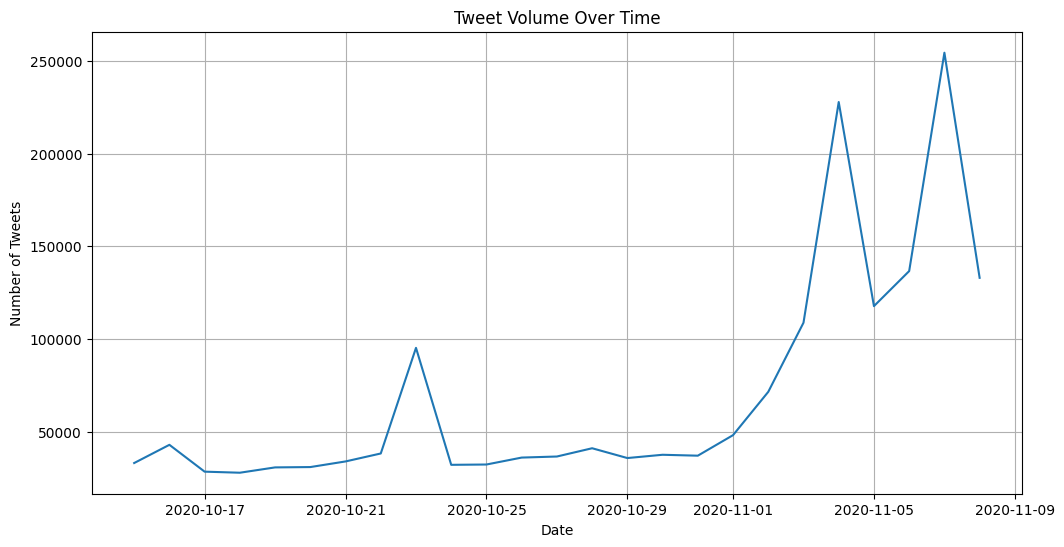

In [44]:
import matplotlib.pyplot as plt

df['date'].value_counts().sort_index().plot(
    kind='line',
    figsize=(12, 6),
    title="Tweet Volume Over Time"
)
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.grid(True)
plt.show()

In [46]:
!pip install vaderSentiment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [48]:
batch_size = 10000  # Adjust based on performance
sentiments = []

for i in range(0, len(df), batch_size):
    print(f"Processing batch {i} to {i + batch_size}...")
    batch = df['tweet'].iloc[i:i+batch_size].astype(str)
    sentiments.extend([get_sentiment(text) for text in batch])

df['sentiment'] = sentiments


Processing batch 0 to 10000...
Processing batch 10000 to 20000...
Processing batch 20000 to 30000...
Processing batch 30000 to 40000...
Processing batch 40000 to 50000...
Processing batch 50000 to 60000...
Processing batch 60000 to 70000...
Processing batch 70000 to 80000...
Processing batch 80000 to 90000...
Processing batch 90000 to 100000...
Processing batch 100000 to 110000...
Processing batch 110000 to 120000...
Processing batch 120000 to 130000...
Processing batch 130000 to 140000...
Processing batch 140000 to 150000...
Processing batch 150000 to 160000...
Processing batch 160000 to 170000...
Processing batch 170000 to 180000...
Processing batch 180000 to 190000...
Processing batch 190000 to 200000...
Processing batch 200000 to 210000...
Processing batch 210000 to 220000...
Processing batch 220000 to 230000...
Processing batch 230000 to 240000...
Processing batch 240000 to 250000...
Processing batch 250000 to 260000...
Processing batch 260000 to 270000...
Processing batch 270000 

In [22]:
import pandas as pd  

# Read in chunks to avoid memory issues  
chunk_size = 10000  

def load_data(file_path):  
    chunks = pd.read_csv(  
        file_path,  
        encoding="ISO-8859-1",  
        on_bad_lines="skip",  
        engine="python",  
        sep=",",  
        chunksize=chunk_size,  
        dtype={"tweet_id": str}  # Ensures tweet_id is a string  
    )  
    return pd.concat(chunks, ignore_index=True)  

# Load datasets  
df_trump = load_data("/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv")  
df_biden = load_data("/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv")  

# Convert numerical columns  
numeric_cols = ["likes", "retweet_count", "user_followers_count"]  
df_trump[numeric_cols] = df_trump[numeric_cols].apply(pd.to_numeric, errors="coerce")  
df_biden[numeric_cols] = df_biden[numeric_cols].apply(pd.to_numeric, errors="coerce")  

# Display basic info  
print(df_trump.info())  
print(df_biden.info())  

# Show first few rows  
print(df_trump.head())  
print(df_biden.head())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971087 entries, 0 to 971086
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            971087 non-null  object 
 1   tweet_id              971073 non-null  object 
 2   tweet                 971073 non-null  object 
 3   likes                 970912 non-null  float64
 4   retweet_count         970933 non-null  float64
 5   source                970057 non-null  object 
 6   user_id               970929 non-null  object 
 7   user_name             970911 non-null  object 
 8   user_screen_name      970933 non-null  object 
 9   user_description      869661 non-null  object 
 10  user_join_date        970779 non-null  object 
 11  user_followers_count  970770 non-null  float64
 12  user_location         675830 non-null  object 
 13  lat                   445702 non-null  object 
 14  long                  445705 non-null  object 
 15  

In [50]:
!pip install tqdm
from tqdm import tqdm
tqdm.pandas()


In [51]:
df['sentiment'] = df['tweet'].astype(str).progress_apply(get_sentiment)


100%|██████████| 1747805/1747805 [04:22<00:00, 6656.54it/s] 
